In [2]:
dic1={"Nombre":"Pedro","Edad":15}

In [3]:
dic1

{'Edad': 15, 'Nombre': 'Pedro'}

In [4]:
dic1["Nombre"]

'Pedro'

In [5]:
dic1["Edad"]

15

In [6]:
dic1.get("Nombre"),dic1.get("Teléfono")

('Pedro', None)

In [7]:
dic1.keys()

dict_keys(['Edad', 'Nombre'])

In [8]:
dic1.values()

dict_values([15, 'Pedro'])

In [9]:
dic1.items()

dict_items([('Edad', 15), ('Nombre', 'Pedro')])

In [10]:
dic2={"Clientes":[
    {"Nombre":"Pedro","Edad":15},
    {"Nombre":"Marta","Edad":25}
]}

In [11]:
dic2.get("Clientes")[1].get("Edad")

25

In [12]:
dic2["Clientes"][1]["Edad"]

25

In [13]:
import requests 

In [14]:
url="http://servizos.meteogalicia.gal/rss/observacion/observacionConcellos.action"

In [15]:
respuesta=requests.get(url)

In [16]:
respuesta

<Response [200]>

In [17]:
import json

In [18]:
datos=json.loads(respuesta.text)

In [19]:
datos['listaObservacionConcellos'][0].get("temperatura")

15.9

In [30]:
rdd=sc.parallelize(datos['listaObservacionConcellos'])

In [40]:
meteoRDD=rdd.map(lambda a:(a.get("nomeConcello"),
                           a.get("temperatura"),
                          a.get("dataLocal")))

meteoRDD.take(5)

[('A Baña', 15.9, '2018-11-16T17:51:00'),
 ('A Bola', 15.1, '2018-11-16T17:51:00'),
 ('A Cañiza', 13.8, '2018-11-16T17:51:00'),
 ('A Capela', 17.2, '2018-11-16T17:51:00'),
 ('A Coruña', 19.4, '2018-11-16T17:51:00')]

In [45]:
meteoRDD.map(lambda a:a[1]).mean()

16.717142857142857

In [46]:
meteoRDD.map(lambda a:a[1]).stats()

(count: 315, mean: 16.717142857142857, stdev: 1.9059367805197183, max: 20.9, min: 10.4)

In [53]:
meteoRDD.filter(lambda a:a[0]=="Vigo").collect()

[('Vigo', 20.5, '2018-11-16T17:51:00')]

In [58]:
meteoRDD.filter(lambda a:"vi" in a[0].lower()).collect()

[('Avión', 15.8, '2018-11-16T17:51:00'),
 ('Carballeda de Avia', 15.7, '2018-11-16T17:51:00'),
 ('Navia de Suarna', 16.4, '2018-11-16T17:51:00'),
 ('O Saviñao', 15.7, '2018-11-16T17:51:00'),
 ('O Vicedo', 17.6, '2018-11-16T17:51:00'),
 ('Ribadavia', 15.6, '2018-11-16T17:51:00'),
 ('San Cibrao das Viñas', 17.6, '2018-11-16T17:51:00'),
 ('Valdoviño', 18.6, '2018-11-16T17:51:00'),
 ('Viana do Bolo', 14.0, '2018-11-16T17:51:00'),
 ('Vigo', 20.5, '2018-11-16T17:51:00'),
 ('Vila de Cruces', 16.8, '2018-11-16T17:51:00'),
 ('Vilaboa', 17.6, '2018-11-16T17:51:00'),
 ('Vilagarcía de Arousa', 18.4, '2018-11-16T17:51:00'),
 ('Vilalba', 16.1, '2018-11-16T17:51:00'),
 ('Vilamarín', 16.2, '2018-11-16T17:51:00'),
 ('Vilamartín de Valdeorras', 17.2, '2018-11-16T17:51:00'),
 ('Vilanova de Arousa', 17.3, '2018-11-16T17:51:00'),
 ('Vilar de Barrio', 14.3, '2018-11-16T17:51:00'),
 ('Vilar de Santos', 14.4, '2018-11-16T17:51:00'),
 ('Vilardevós', 13.5, '2018-11-16T17:51:00'),
 ('Vilariño de Conso', 12.8, '2

In [60]:
meteoRDD.filter(lambda a:a[0].startswith("Vi") and a[1]>17).collect()

[('Vigo', 20.5, '2018-11-16T17:51:00'),
 ('Vilaboa', 17.6, '2018-11-16T17:51:00'),
 ('Vilagarcía de Arousa', 18.4, '2018-11-16T17:51:00'),
 ('Vilamartín de Valdeorras', 17.2, '2018-11-16T17:51:00'),
 ('Vilanova de Arousa', 17.3, '2018-11-16T17:51:00'),
 ('Vilarmaior', 18.6, '2018-11-16T17:51:00'),
 ('Vimianzo', 17.5, '2018-11-16T17:51:00'),
 ('Viveiro', 18.1, '2018-11-16T17:51:00')]

In [63]:
meteoDF=meteoRDD.toDF(["Concello","Temperatura","Fecha"])

In [64]:
meteoDF.show()

+--------------------+-----------+-------------------+
|            Concello|Temperatura|              Fecha|
+--------------------+-----------+-------------------+
|              A Baña|       15.9|2018-11-16T17:51:00|
|              A Bola|       15.1|2018-11-16T17:51:00|
|            A Cañiza|       13.8|2018-11-16T17:51:00|
|            A Capela|       17.2|2018-11-16T17:51:00|
|            A Coruña|       19.4|2018-11-16T17:51:00|
|           A Estrada|       17.8|2018-11-16T17:51:00|
|        A Fonsagrada|       13.2|2018-11-16T17:51:00|
|            A Guarda|       18.3|2018-11-16T17:51:00|
|            A Gudiña|       11.7|2018-11-16T17:51:00|
|    A Illa de Arousa|       17.3|2018-11-16T17:51:00|
|              A Lama|       16.9|2018-11-16T17:51:00|
|             A Merca|       15.8|2018-11-16T17:51:00|
|          A Mezquita|       11.0|2018-11-16T17:51:00|
|         A Pastoriza|       16.5|2018-11-16T17:51:00|
|            A Peroxa|       16.0|2018-11-16T17:51:00|
|A Pobra d

In [65]:
meteoPandas=meteoDF.toPandas()

In [66]:
meteoPandas

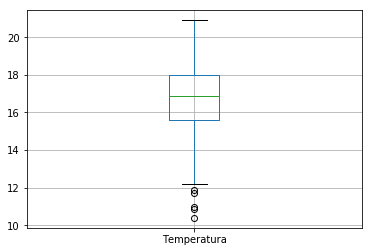

In [69]:
meteoPandas.boxplot()

In [71]:
from datetime import datetime

In [72]:
datetime.now()

datetime.datetime(2018, 11, 16, 19, 40, 45, 385355)

In [73]:
fecha=datetime(2015,11,16)

In [74]:
fecha.weekday()

0

In [75]:
fecha.month

11

In [76]:
texto="15/12/1998"

In [77]:
fecha2=datetime.strptime(texto,"%d/%m/%Y")

In [78]:
fecha2

datetime.datetime(1998, 12, 15, 0, 0)

In [81]:
texto3="2018-11-16T17:51:00"

In [82]:
fecha3=datetime.strptime(texto3,"%Y-%m-%dT%H:%M:%S")

In [83]:
fecha3

datetime.datetime(2018, 11, 16, 17, 51)